In [9]:
import pandas as pd
import numpy as np;
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import datetime
import matplotlib.pyplot as plt
import matplotlib
from langchain_openai import OpenAI
from langchain_openai import ChatOpenAI
import seaborn as sns
import os 
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [10]:
df=pd.read_csv("/home/gautham/Downloads/haller.csv")

In [11]:
df

,_id,date,dateUTCTz,dateClientTz,dateLocationTz,entity.date,entity.nDate,entity.tenantId,entity.accountId,entity.source,...,conversions,value,viewThroughConversions,viewableImpressions,videoViews,trackedImpressions,trackedImpressionsGLSA,adSpendGLSA,viewRateEq2,adSpendSEARCH
0,66432382b604d3f6068894df,2024-01-15T05:00:00.000Z,2024-01-15T05:00:00.000Z,2024-01-15T00:00:00.000Z,2024-01-15T00:00:00.000Z,2024-01-15T05:00:00.000Z,1705276800,663e075633cf7a4f558d432f,4469960866,google,...,0.0,0,0,0,0,0,168,133.01,0,0.000000
1,66432382b604d3f6068894fd,2024-01-15T05:00:00.000Z,2024-01-15T05:00:00.000Z,2024-01-15T00:00:00.000Z,2024-01-15T00:00:00.000Z,2024-01-15T05:00:00.000Z,1705276800,663e075633cf7a4f558d432f,8114622980,google,...,1.0,0,0,0,0,28,0,0.00,0,11.760000
2,66432383b604d3f606889554,2024-01-15T05:00:00.000Z,2024-01-15T05:00:00.000Z,2024-01-15T00:00:00.000Z,2024-01-15T00:00:00.000Z,2024-01-15T05:00:00.000Z,1705276800,663e075633cf7a4f558d432f,8114622980,google,...,6.0,0,0,0,0,540,0,0.00,0,487.552644
3,66432383b604d3f6068895a8,2024-01-15T05:00:00.000Z,2024-01-15T05:00:00.000Z,2024-01-15T00:00:00.000Z,2024-01-15T00:00:00.000Z,2024-01-15T05:00:00.000Z,1705276800,663e075633cf7a4f558d432f,8114622980,google,...,1.0,0,0,0,0,272,0,0.00,0,184.710000
4,66432383b604d3f6068895aa,2024-01-15T05:00:00.000Z,2024-01-15T05:00:00.000Z,2024-01-15T00:00:00.000Z,2024-01-15T00:00:00.000Z,2024-01-15T05:00:00.000Z,1705276800,663e075633cf7a4f558d432f,8114622980,google,...,0.0,0,0,0,0,23,0,0.00,0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,664722ed68a749df22c1d95f,2024-05-14T04:00:00.000Z,2024-05-14T04:00:00.000Z,2024-05-14T00:00:00.000Z,2024-05-14T00:00:00.000Z,2024-05-14T04:00:00.000Z,1715644800,663e075633cf7a4f558d432f,8114622980,google,...,0.0,0,0,0,0,213,0,0.00,0,122.694081
654,664722ed68a749df22c1d960,2024-05-14T04:00:00.000Z,2024-05-14T04:00:00.000Z,2024-05-14T00:00:00.000Z,2024-05-14T00:00:00.000Z,2024-05-14T04:00:00.000Z,1715644800,663e075633cf7a4f558d432f,8114622980,google,...,1.0,0,0,0,0,159,0,0.00,0,139.808477
655,664722ed68a749df22c1d961,2024-05-14T04:00:00.000Z,2024-05-14T04:00:00.000Z,2024-05-14T00:00:00.000Z,2024-05-14T00:00:00.000Z,2024-05-14T04:00:00.000Z,1715644800,663e075633cf7a4f558d432f,7658192464,google,...,0.0,0,0,0,0,0,273,64.40,0,0.000000
656,664722ed68a749df22c1d962,2024-05-14T04:00:00.000Z,2024-05-14T04:00:00.000Z,2024-05-14T00:00:00.000Z,2024-05-14T00:00:00.000Z,2024-05-14T04:00:00.000Z,1715644800,663e075633cf7a4f558d432f,8114622980,google,...,0.0,0,0,0,0,96,0,0.00,0,91.844624


In [16]:
df.head()

,_id,date,dateUTCTz,dateClientTz,dateLocationTz,entity.date,entity.nDate,entity.tenantId,entity.accountId,entity.source,...,conversions,value,viewThroughConversions,viewableImpressions,videoViews,trackedImpressions,trackedImpressionsGLSA,adSpendGLSA,viewRateEq2,adSpendSEARCH
0,66432382b604d3f6068894df,2024-01-15T05:00:00.000Z,2024-01-15T05:00:00.000Z,2024-01-15T00:00:00.000Z,2024-01-15T00:00:00.000Z,2024-01-15T05:00:00.000Z,1705276800,663e075633cf7a4f558d432f,4469960866,google,...,0.0,0,0,0,0,0,168,133.01,0,0.000000
1,66432382b604d3f6068894fd,2024-01-15T05:00:00.000Z,2024-01-15T05:00:00.000Z,2024-01-15T00:00:00.000Z,2024-01-15T00:00:00.000Z,2024-01-15T05:00:00.000Z,1705276800,663e075633cf7a4f558d432f,8114622980,google,...,1.0,0,0,0,0,28,0,0.00,0,11.760000
2,66432383b604d3f606889554,2024-01-15T05:00:00.000Z,2024-01-15T05:00:00.000Z,2024-01-15T00:00:00.000Z,2024-01-15T00:00:00.000Z,2024-01-15T05:00:00.000Z,1705276800,663e075633cf7a4f558d432f,8114622980,google,...,6.0,0,0,0,0,540,0,0.00,0,487.552644
3,66432383b604d3f6068895a8,2024-01-15T05:00:00.000Z,2024-01-15T05:00:00.000Z,2024-01-15T00:00:00.000Z,2024-01-15T00:00:00.000Z,2024-01-15T05:00:00.000Z,1705276800,663e075633cf7a4f558d432f,8114622980,google,...,1.0,0,0,0,0,272,0,0.00,0,184.710000
4,66432383b604d3f6068895aa,2024-01-15T05:00:00.000Z,2024-01-15T05:00:00.000Z,2024-01-15T00:00:00.000Z,2024-01-15T00:00:00.000Z,2024-01-15T05:00:00.000Z,1705276800,663e075633cf7a4f558d432f,8114622980,google,...,0.0,0,0,0,0,23,0,0.00,0,2.300000


In [17]:
df.tail()

,_id,date,dateUTCTz,dateClientTz,dateLocationTz,entity.date,entity.nDate,entity.tenantId,entity.accountId,entity.source,...,conversions,value,viewThroughConversions,viewableImpressions,videoViews,trackedImpressions,trackedImpressionsGLSA,adSpendGLSA,viewRateEq2,adSpendSEARCH
653,664722ed68a749df22c1d95f,2024-05-14T04:00:00.000Z,2024-05-14T04:00:00.000Z,2024-05-14T00:00:00.000Z,2024-05-14T00:00:00.000Z,2024-05-14T04:00:00.000Z,1715644800,663e075633cf7a4f558d432f,8114622980,google,...,0.0,0,0,0,0,213,0,0.0,0,122.694081
654,664722ed68a749df22c1d960,2024-05-14T04:00:00.000Z,2024-05-14T04:00:00.000Z,2024-05-14T00:00:00.000Z,2024-05-14T00:00:00.000Z,2024-05-14T04:00:00.000Z,1715644800,663e075633cf7a4f558d432f,8114622980,google,...,1.0,0,0,0,0,159,0,0.0,0,139.808477
655,664722ed68a749df22c1d961,2024-05-14T04:00:00.000Z,2024-05-14T04:00:00.000Z,2024-05-14T00:00:00.000Z,2024-05-14T00:00:00.000Z,2024-05-14T04:00:00.000Z,1715644800,663e075633cf7a4f558d432f,7658192464,google,...,0.0,0,0,0,0,0,273,64.4,0,0.000000
656,664722ed68a749df22c1d962,2024-05-14T04:00:00.000Z,2024-05-14T04:00:00.000Z,2024-05-14T00:00:00.000Z,2024-05-14T00:00:00.000Z,2024-05-14T04:00:00.000Z,1715644800,663e075633cf7a4f558d432f,8114622980,google,...,0.0,0,0,0,0,96,0,0.0,0,91.844624
657,664722ed68a749df22c1d963,2024-05-14T04:00:00.000Z,2024-05-14T04:00:00.000Z,2024-05-14T00:00:00.000Z,2024-05-14T00:00:00.000Z,2024-05-14T04:00:00.000Z,1715644800,663e075633cf7a4f558d432f,8114622980,google,...,0.0,0,0,0,0,74,0,0.0,0,46.590000


In [18]:
df.columns

Index(['_id', 'date', 'dateUTCTz', 'dateClientTz', 'dateLocationTz',
       'entity.date', 'entity.nDate', 'entity.tenantId', 'entity.accountId',
       'entity.source', 'entity.medium', 'entity.campaign',
       'entity.campaignGroup', 'entity.campaignGroupId', 'entity.campaignId',
       'entity.channelNameId', 'entity.channelId', 'entity.platformId',
       'entity.campaignTypeId', 'entity.channelTypeName', 'entity.channelName',
       'entity.platformName', 'entity.campaignTypeName', 'entity.locationId',
       'entity.locationGroupId', 'entity.marketSegmentId', 'entity.noaaRegion',
       'entity.nielsonRegion', 'entity.dayOfWeek', 'adSpend',
       'imprAbsTopSearchEstEq1', 'imprAbsTopSearchEstEq2',
       'imprTopSearchEstEq1', 'imprTopSearchEstEq2', 'imprShareSearchEstEq1',
       'imprShareSearchEstEq2', 'isLostBudgetSearchEstEq1',
       'isLostBudgetSearchEstEq2', 'imprShareDisplayVideoEstEq1',
       'imprShareDisplayVideoEstEq2', 'isLostBudgetDisplayVideoEstEq1',
       'i

In [19]:
df.shape

(658, 69)

In [20]:
df['entity.date'] == df['date']

0      True
1      True
2      True
3      True
4      True
       ... 
653    True
654    True
655    True
656    True
657    True
Length: 658, dtype: bool

In [21]:
df['date_cleaned'] = pd.to_datetime(df['date'])
df['date_cleaned'] = df['date_cleaned'].dt.strftime('%d-%m-%Y')
df['date_cleaned'] = pd.to_datetime(df['date_cleaned'], format="%d-%m-%Y")
df['date_cleaned']

0     2024-01-15
1     2024-01-15
2     2024-01-15
3     2024-01-15
4     2024-01-15
         ...    
653   2024-05-14
654   2024-05-14
655   2024-05-14
656   2024-05-14
657   2024-05-14
Name: date_cleaned, Length: 658, dtype: datetime64[ns]

In [22]:
df['date_cleaned'].min(),df['date_cleaned'].max()

(Timestamp('2024-01-15 00:00:00'), Timestamp('2024-05-14 00:00:00'))

In [23]:
df['date_cleaned'].value_counts().sort_index()

date_cleaned
2024-01-15    18
2024-01-16    19
2024-01-17    19
2024-01-18    19
2024-01-19    19
2024-01-20    19
2024-01-21    15
2024-01-22    18
2024-01-23    18
2024-01-24    19
2024-01-25    18
2024-01-26    18
2024-01-27    19
2024-01-28    15
2024-01-29    19
2024-01-30    19
2024-01-31    22
2024-02-01    23
2024-02-02    23
2024-02-03    23
2024-02-04    23
2024-02-05    23
2024-02-06    23
2024-02-07    23
2024-02-08    23
2024-02-09    23
2024-02-10    23
2024-02-11    23
2024-02-12    23
2024-02-13    23
2024-02-14    23
2024-05-14    23
Name: count, dtype: int64

In [24]:
adspend_df= df.groupby('date_cleaned')['adSpend'].sum().reset_index()
adspend_df

,date_cleaned,adSpend
0,2024-01-15,3016.214896
1,2024-01-16,2919.341041
2,2024-01-17,4526.397852
3,2024-01-18,3880.776454
4,2024-01-19,3888.217352
5,2024-01-20,4180.269831
6,2024-01-21,3753.175342
7,2024-01-22,5049.177601
8,2024-01-23,4620.777329
9,2024-01-24,4539.509531


In [25]:
len(adspend_df)

32

In [26]:
adspend_df.head()

,date_cleaned,adSpend
0,2024-01-15,3016.214896
1,2024-01-16,2919.341041
2,2024-01-17,4526.397852
3,2024-01-18,3880.776454
4,2024-01-19,3888.217352


In [27]:
adspend_df.tail()

,date_cleaned,adSpend
27,2024-02-11,1947.371672
28,2024-02-12,3858.640894
29,2024-02-13,3583.312179
30,2024-02-14,3403.073013
31,2024-05-14,4371.354363


<Axes: >

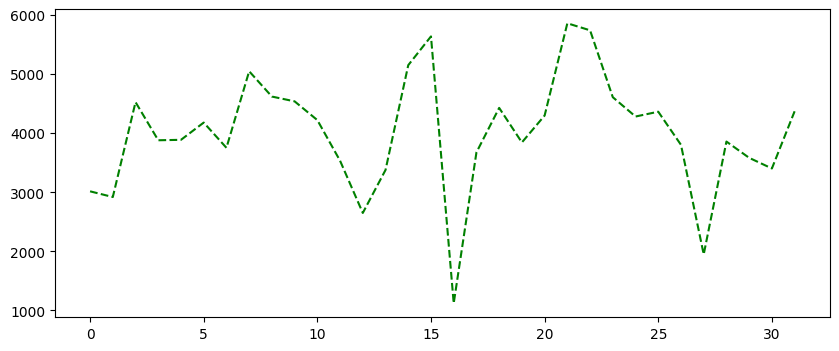

In [28]:
adspend_df['adSpend'].plot(figsize=(10,4),ls='--',color='green')

In [29]:
adspend_df.set_index('date_cleaned', inplace=True)

In [30]:
adspend_df.head()

,adSpend
date_cleaned,
2024-01-15,3016.214896
2024-01-16,2919.341041
2024-01-17,4526.397852
2024-01-18,3880.776454
2024-01-19,3888.217352


In [32]:
adspend_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2024-01-15 to 2024-05-14
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   adSpend  32 non-null     float64
dtypes: float64(1)
memory usage: 512.0 bytes


In [33]:
adspend_df.resample(rule='A').min()

,adSpend
date_cleaned,
2024-12-31,1120.422443


In [34]:
adspend_df.resample(rule='A').max()

,adSpend
date_cleaned,
2024-12-31,5861.729595


In [42]:
adspend_df.isna().sum()

adSpend    0
dtype: int64

In [48]:
 test = adspend_df[20:]

In [49]:
test

,adSpend
date_cleaned,
2024-02-04,4299.398891
2024-02-05,5861.729595
2024-02-06,5742.431190
2024-02-07,4609.708704
2024-02-08,4282.724983
2024-02-09,4364.180555
2024-02-10,3803.113874
2024-02-11,1947.371672
2024-02-12,3858.640894


In [52]:
train=adspend_df[:20]

In [53]:
train

,adSpend
date_cleaned,
2024-01-15,3016.214896
2024-01-16,2919.341041
2024-01-17,4526.397852
2024-01-18,3880.776454
2024-01-19,3888.217352
2024-01-20,4180.269831
2024-01-21,3753.175342
2024-01-22,5049.177601
2024-01-23,4620.777329


In [45]:
from statsmodels.tsa.stattools import adfuller

In [46]:
def adf_fuller(series):
    results=adfuller(series)
    print('ADF Statistics:{}'.format(results[0]))
    print('Pvalue:{}'.format(results[1]))
    if results[1]<=0.5:
        print('strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary')
    else:
        print('weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ')

In [47]:
adf_fuller(adspend_df['adSpend'])

ADF Statistics:-4.564595990512437
Pvalue:0.00015003440682658501
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [55]:
train_end='2024-02-03'
train_data = adspend_df[:train_end]
test_data = adspend_df[train_end:]

In [56]:
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

/home/gautham/Documents/Genai/myprojectenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gautham/Documents/Genai/myprojectenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [57]:
results=model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.47818D+00    |proj g|=  7.13872D-01

At iterate    5    f=  3.09218D+00    |proj g|=  8.42156D-03

At iterate   10    f=  3.08906D+00    |proj g|=  3.17501D-03


 This problem is unconstrained.



At iterate   15    f=  3.08871D+00    |proj g|=  4.95583D-04

At iterate   20    f=  3.08869D+00    |proj g|=  1.25857D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     23      1     0     0   1.835D-06   3.089D+00
  F =   3.0886924272627101     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [58]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            adSpend   No. Observations:                   20
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -61.774
Date:                            Tue, 21 May 2024   AIC                            133.548
Time:                                    17:00:10   BIC                            133.277
Sample:                                01-15-2024   HQIC                           130.205
                                     - 02-03-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1414      1.367     -0.103      0.918      -2.820       2.537
ma.L1         -0.6089      0.854   

In [59]:
forecast_steps = len(test_data)
forecast = results.get_forecast(steps=forecast_steps)
forecast_series = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

In [61]:
forecast_start = '2024-02-04'
forecast_end = '2024-05-14'
forecast_index = pd.date_range(start=forecast_start, end=forecast_end, freq='D')
forecast_steps = len(forecast_index)

In [62]:
future_forecast = results.get_forecast(steps=forecast_steps)
future_forecast_series = pd.Series(future_forecast.predicted_mean, index=forecast_index)
future_confidence_intervals = future_forecast.conf_int()0

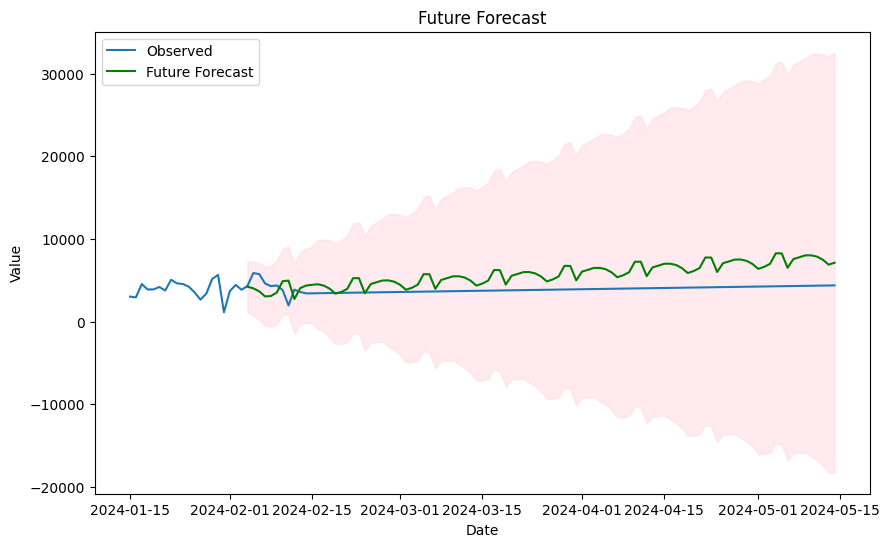

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(adspend_df, label='Observed')
plt.plot(future_forecast_series, label='Future Forecast', color='green')
plt.fill_between(forecast_index, future_confidence_intervals.iloc[:, 0], future_confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Future Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [66]:
future_forecast_series

2024-02-04    4219.899620
2024-02-05    4014.873227
2024-02-06    3659.527630
2024-02-07    3042.215350
2024-02-08    3082.289056
                 ...     
2024-05-10    8010.000154
2024-05-11    7854.974571
2024-05-12    7480.651159
2024-05-13    6880.117120
2024-05-14    7118.416725
Freq: D, Name: predicted_mean, Length: 101, dtype: float64

In [67]:
future_confidence_intervals

,lower adSpend,upper adSpend
2024-02-04,1112.119972,7327.679269
2024-02-05,790.341710,7239.404745
2024-02-06,233.560840,7085.494421
2024-02-07,-522.724030,6607.154730
2024-02-08,-626.877963,6791.456075
...,...,...
2024-05-10,-16300.628235,32320.628542
2024-05-11,-16713.103534,32423.052676
2024-05-12,-17359.894041,32321.196359
2024-05-13,-18289.591649,32049.825889


Text(0, 0.5, 'Value')

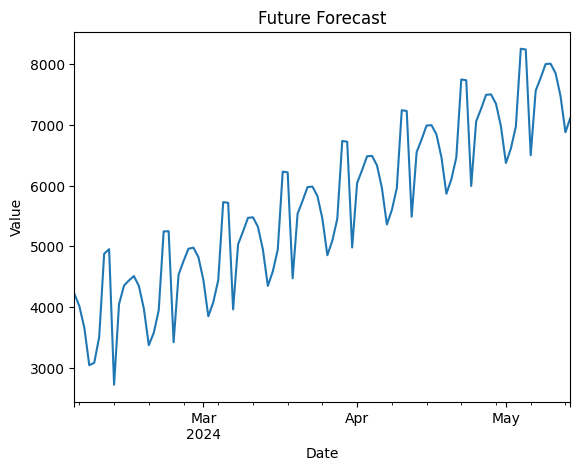

In [68]:
graph = future_forecast_series.plot(kind='line')
plt.title('Future Forecast')
plt.xlabel('Date')
plt.ylabel('Value')